<a href="https://colab.research.google.com/github/Parsa2820/lichess-analysis/blob/master/lichess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chess matplotlib

In [216]:
import requests
import io
import chess.pgn
import matplotlib.pyplot as plt

In [217]:
USERNAME = "parsa2820"

In [218]:
x = requests.get(f"https://lichess.org/api/games/user/{USERNAME}")

In [219]:
pgns = x.text.strip().split("\n\n")
assert len(pgns) % 2 == 0
games = []

for i in range(0, len(pgns), 2):
    pgn = io.StringIO(pgns[i] + pgns[i+1])
    games.append(chess.pgn.read_game(pgn))

In [220]:
performance_by_time = {f"{t:02}": 0 for t in range(0, 24)}

In [221]:
for game in games:
    time = game.headers["UTCTime"][:2]
    result = game.headers["Result"]
    white = game.headers["White"]
    black = game.headers["Black"]
    if result == "1/2-1/2":
        continue
    elif result == "1-0" and white == USERNAME:
        performance_by_time[time] += 1
    elif result == "0-1" and black == USERNAME:
        performance_by_time[time] += 1
    else:
        performance_by_time[time] -= 1

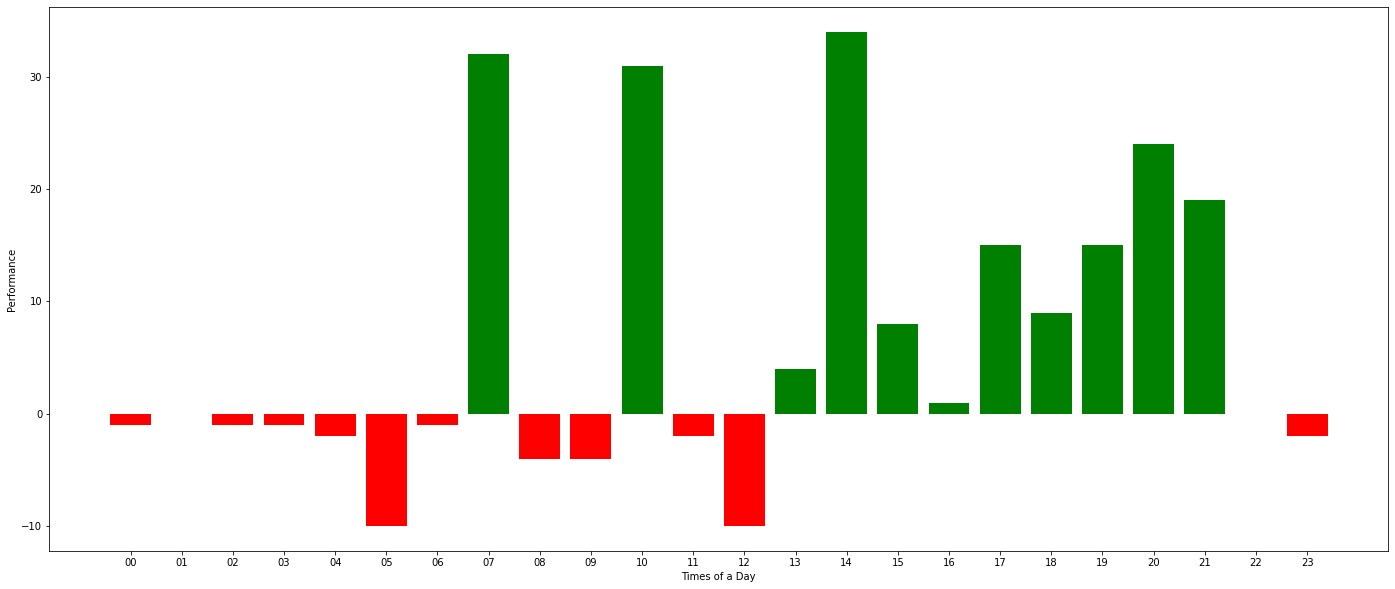

In [222]:
plt.figure(figsize=(24, 10))
plt.bar(
    range(len(performance_by_time)),
    list(performance_by_time.values()),
    align='center',
    color=['g' if v > 0 else 'r' for v in performance_by_time.values()]
)
plt.xticks(range(len(performance_by_time)), list(performance_by_time.keys()))
plt.ylabel("Performance")
plt.xlabel("Times of a Day")
plt.show()